###### [RapidOCR试验](https://rapidai.github.io/RapidOCRDocs/install_usage/api/RapidOCR/#_4)

In [3]:
import cv2
from rapidocr_onnxruntime import RapidOCR
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']  # 使用文泉驿字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题



In [4]:
# img = cv2.imread('images/1.jpg')
img = cv2.imread('images/7.jpeg')

In [5]:
engine = RapidOCR()

result, elapse = engine(img)
print(result)
print(elapse)

[[[[837.0, 297.0], [1017.0, 301.0], [1017.0, 336.0], [837.0, 333.0]], '北京市医疗', 0.9996166], [[[1195.0, 302.0], [1359.0, 299.0], [1359.0, 336.0], [1195.0, 338.0]], '据（电子）', 0.9875563], [[[1077.0, 331.0], [1143.0, 331.0], [1143.0, 355.0], [1077.0, 355.0]], '中', 0.5293385], [[[533.0, 387.0], [695.0, 385.0], [695.0, 409.0], [533.0, 411.0]], '码：11060124', 0.8838347], [[[1299.0, 388.0], [1473.0, 385.0], [1473.0, 409.0], [1299.0, 412.0]], 'sa14.01537013', 0.6093349], [[[533.0, 411.0], [921.0, 410.0], [921.0, 434.0], [533.0, 435.0]], '火状人一0会信用代码：110107+#0025', 0.6931128], [[[531.0, 436.0], [638.0, 436.0], [638.0, 459.0], [531.0, 459.0]], '义业人，曹', 0.609207], [[[1299.0, 434.0], [1478.0, 436.0], [1478.0, 460.0], [1299.0, 458.0]], '#：2021-0-23', 0.7601249], [[[624.0, 469.0], [703.0, 469.0], [703.0, 492.0], [624.0, 492.0]], '明日名称', 0.58486974], [[[816.0, 469.0], [912.0, 469.0], [912.0, 495.0], [816.0, 495.0]], '批量/单位', 0.699729], [[[946.0, 470.0], [1030.0, 470.0], [1030.0, 493.0], [946.0, 493.0]], '

In [15]:
for res in result:
    print(res[0])

[[379.0, 116.0], [531.0, 106.0], [533.0, 130.0], [380.0, 139.0]]
[[758.0, 114.0], [811.0, 105.0], [815.0, 126.0], [762.0, 135.0]]
[[1006.0, 107.0], [1203.0, 100.0], [1204.0, 129.0], [1007.0, 136.0]]
[[379.0, 134.0], [513.0, 132.0], [513.0, 152.0], [380.0, 155.0]]
[[741.0, 134.0], [832.0, 122.0], [836.0, 152.0], [745.0, 164.0]]
[[1012.0, 129.0], [1147.0, 133.0], [1147.0, 154.0], [1012.0, 149.0]]
[[379.0, 150.0], [469.0, 145.0], [470.0, 165.0], [380.0, 169.0]]
[[731.0, 155.0], [839.0, 145.0], [841.0, 168.0], [733.0, 178.0]]
[[1015.0, 147.0], [1105.0, 147.0], [1105.0, 163.0], [1015.0, 163.0]]
[[376.0, 164.0], [565.0, 155.0], [566.0, 175.0], [377.0, 184.0]]
[[631.0, 158.0], [675.0, 163.0], [673.0, 179.0], [629.0, 174.0]]
[[1014.0, 162.0], [1068.0, 162.0], [1068.0, 179.0], [1014.0, 179.0]]
[[375.0, 179.0], [474.0, 179.0], [474.0, 198.0], [375.0, 198.0]]
[[1014.0, 174.0], [1153.0, 179.0], [1152.0, 202.0], [1013.0, 197.0]]
[[575.0, 184.0], [727.0, 204.0], [724.0, 227.0], [572.0, 207.0]]
[[438

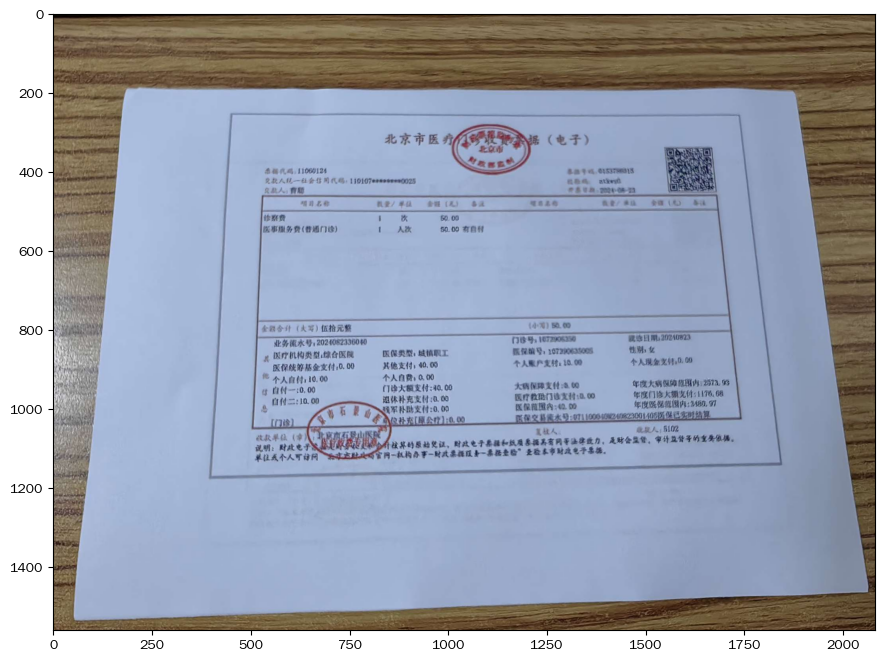

In [6]:
plt.figure(figsize=(12,8))
plt.imshow(img[:,:,::-1])

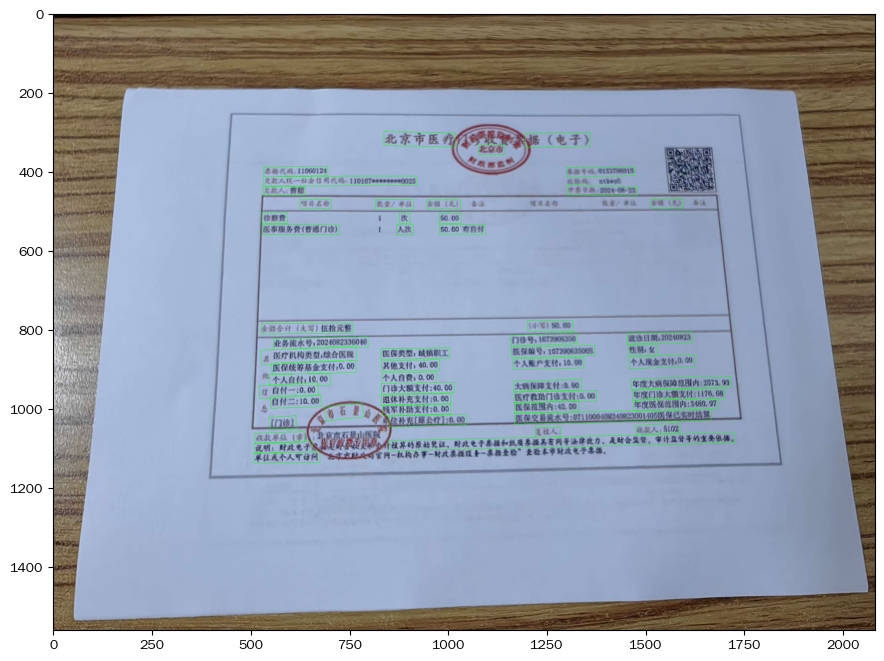

In [7]:
img_copy = img.copy()
for res in result:
    # 定义四个顶点坐标
    pts = np.array(res[0], np.int32)
    # 顶点个数：4，矩阵变成 4*1*2 维
    pts = pts.reshape((-1, 1, 2))
    # 画一个绿色边框的矩形，参数 2：左上角坐标，参数 3：右下角坐标
    cv2.polylines(img_copy, [pts], True , (0, 255, 0))

plt.figure(figsize=(12,8))
plt.imshow(img_copy[:,:,::-1])

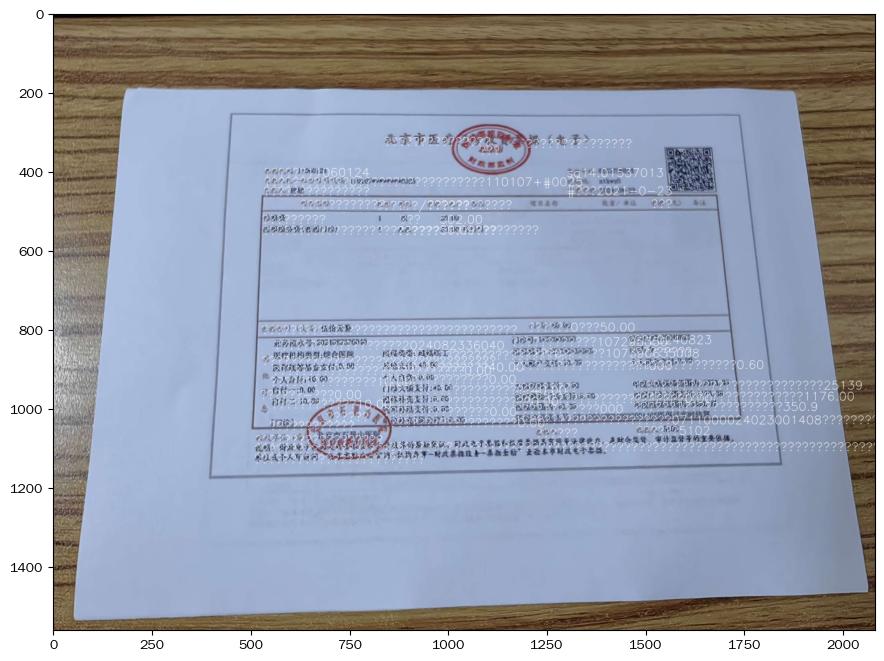

In [8]:
# 添加文字
img_copy = img.copy()
font = cv2.FONT_HERSHEY_SIMPLEX
for res in result:
    cv2.putText(img_copy, res[1], [int(x) for x in res[0][3]], font,
            1, (255, 255, 255), 1, lineType=cv2.LINE_AA)
    
# cv2.putText(img_copy, 'ex2tron', [10, 500], font,1, (0, 255, 0), 1, lineType=cv2.LINE_AA)


plt.figure(figsize=(12,8))
plt.imshow(img_copy[:,:,::-1])

In [10]:
from PIL import ImageFont, ImageDraw, Image

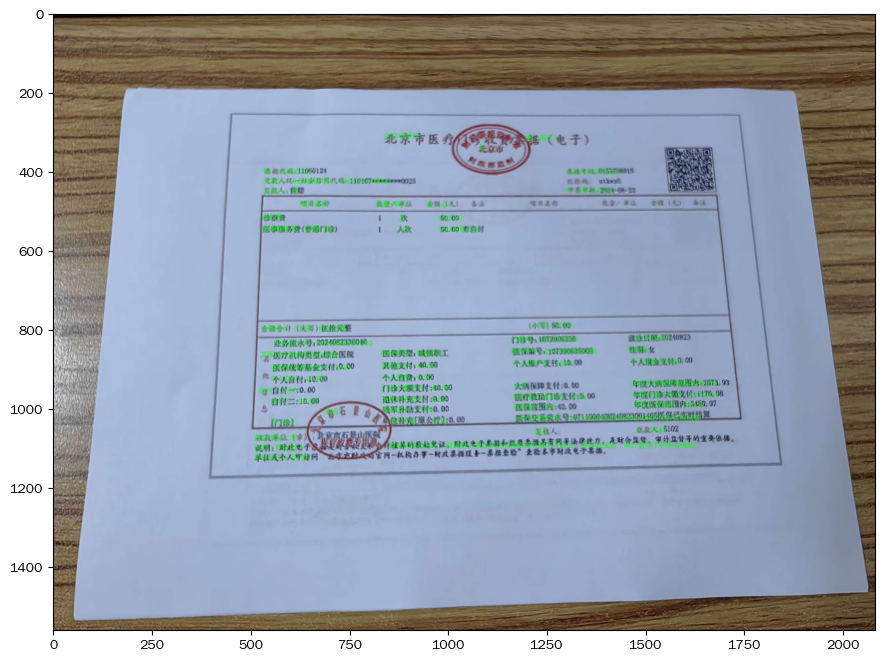

In [11]:
# 转换图像格式
image_pil = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
# 加载中文字体文件
font = ImageFont.truetype('/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc', 18)

# 在图像上写中文
draw = ImageDraw.Draw(image_pil)

for res in result:
    draw.text(res[0][0], res[1], font=font, fill=(0, 255, 0))  # 在指定位置绘制文字
    # draw.text((50, 100), "你好，世界", font=font, fill=(0, 0, 0))  # 在指定位置绘制文字


plt.figure(figsize=(12,8))
plt.imshow(image_pil)